# 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
fpath = r'C:\Users\Mei\City-Bikes'

In [3]:
df = pd.read_pickle(os.path.join(fpath,'clean_data','citibike_clean_1.pkl'))

In [4]:
df.shape

(50000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  50000 non-null  object        
 1   bike_id                  50000 non-null  object        
 2   weekday                  50000 non-null  object        
 3   start_hour               50000 non-null  int64         
 4   start_time               50000 non-null  datetime64[ns]
 5   start_station_id         50000 non-null  object        
 6   start_station_name       50000 non-null  object        
 7   start_station_latitude   50000 non-null  float64       
 8   start_station_longitude  50000 non-null  float64       
 9   end_time                 50000 non-null  datetime64[ns]
 10  end_station_id           50000 non-null  object        
 11  end_station_name         50000 non-null  object        
 12  end_station_latitude     50000 n

# 2. Pre analysis

In [6]:
# Pairplot to observe the possible relations between the variables
plist = ['start_hour','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','trip_duration','birth_year']

In [7]:
df_pplot = df[plist]

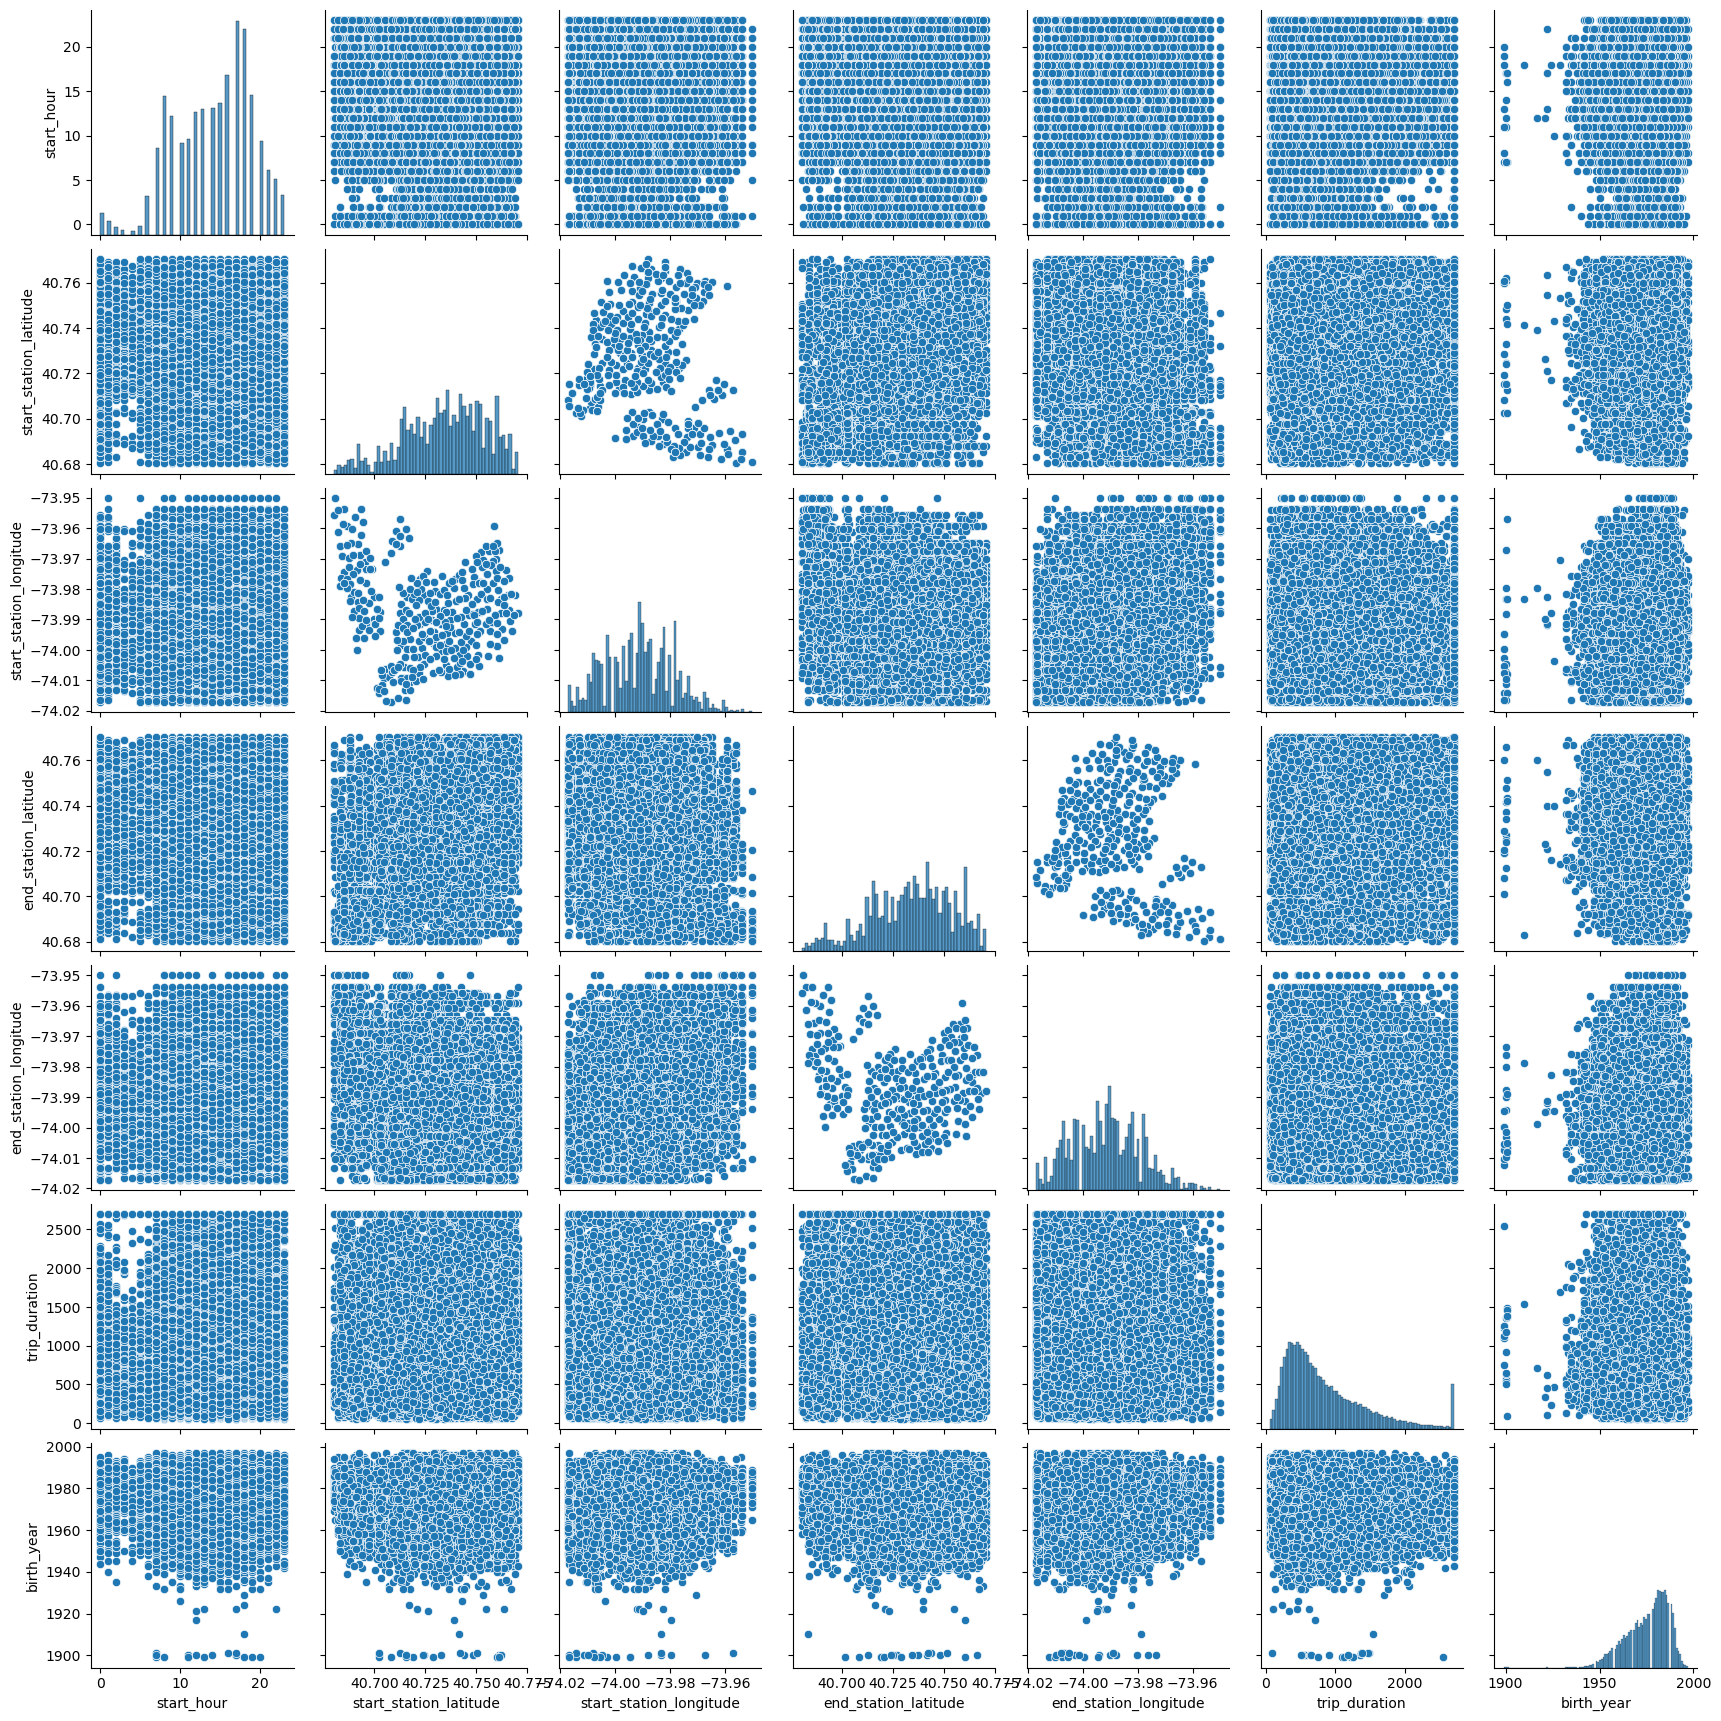

In [8]:
pplot = sns.pairplot(df_pplot)

### Conclusions: from this figure, it can be seen that there is no any two variables having a signicant linear correlation.  


# 3. Supervised machine learning - Regression analysis 

### regression model

In [21]:
df_nonnull = df[df['birth_year']>0]

In [22]:
df_nonnull['birth_year'] = df_nonnull['birth_year'].astype(int)

C:\Users\Mei\AppData\Local\Temp\ipykernel_1540\1669921750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonnull['birth_year'] = df_nonnull['birth_year'].astype(int)


In [23]:
# reshape 'start_hour' and 'birth_year'
X = df_nonnull['start_hour'].values.reshape(-1,1)
Y = df_nonnull['birth_year'].values.reshape(-1,1)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =0)

In [25]:
reg = LinearRegression()

In [26]:
reg.fit(X_train, Y_train)

LinearRegression()

In [27]:
y_predicted = reg.predict(X_test)

In [29]:
yy = [Y_test, y_predicted]
df_yy = pd.DataFrame({'actual':Y_test.flatten(),'predicted':y_predicted.flatten()})
df_yy.head()

,actual,predicted
0,1984,1975.746859
1,1965,1976.038491
2,1960,1976.184307
3,1980,1975.892675
4,1987,1976.475938


### RMSE and R2 score

In [30]:
RMSE = mean_squared_error(Y_test, y_predicted,squared = False)

In [31]:
R2 = r2_score(Y_test, y_predicted)

In [33]:
print('mean squared error:', RMSE)
print('r2 score:', R2)
print('slope:', reg.coef_)

mean squared error: 11.122666301810193
r2 score: 0.003858643697977726
slope: [[0.14581588]]


### Conclusion: No significant linear relationship between 'start_hour' and 'birth_year' is found.